<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_13_Matplotlib Format Charts.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Subplots with Bar Charts (2.13.1)

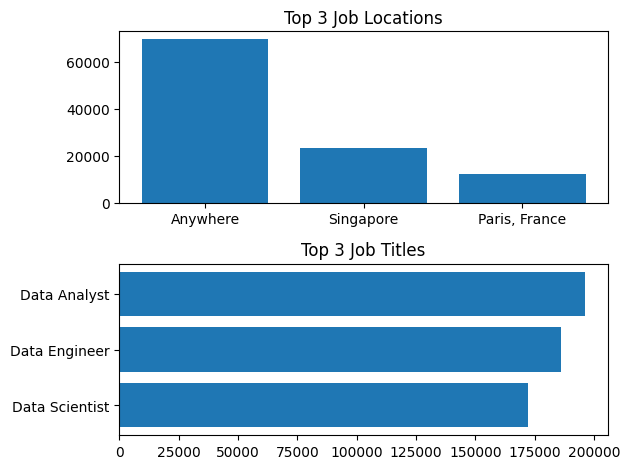

In [18]:
fig, ax = plt.subplots(2, 1)

# Top 3 job locations
job_locations = df['job_location'].value_counts().head(3)
ax[0].bar(job_locations.index, job_locations.values)
ax[0].set_title('Top 3 Job Locations')

# Top 3 job titles
job_titles = df['job_title_short'].value_counts().head(3)
ax[1].barh(job_titles.index, job_titles.values)
ax[1].set_title('Top 3 Job Titles')
ax[1].invert_yaxis()

fig.tight_layout()
plt.show()

---

## 🟨 Subplots with Job Titles by Schedule (2.13.2)

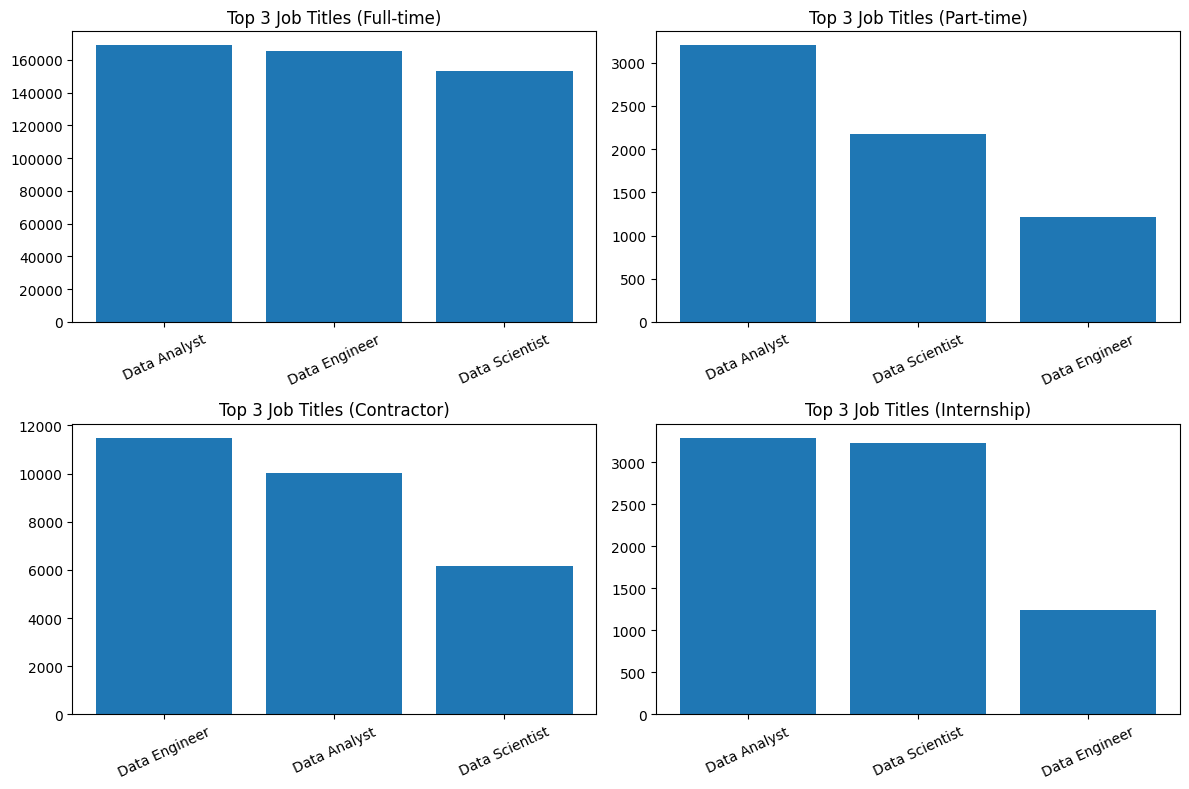

In [73]:
# Code Needed
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')
    ax[i//2, i%2].tick_params(axis = 'x', rotation=25)
    
fig.tight_layout()    
plt.show()    
    

---

## 🟥 Top Skills for Job Roles Subplots (2.13.3)

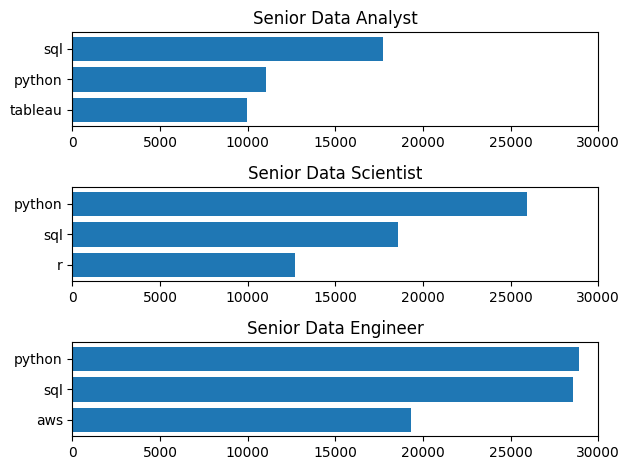

In [ ]:
# Code Needed
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']

fig, ax = plt.subplots(3, 1)

for i, job_role in enumerate(job_roles):
    df_job_title = df[df['job_title_short'] == job_role]
    df_exploded = df_job_title.explode('job_skills')
    job_skills = df_exploded['job_skills'].value_counts().head(3)
    ax[i].barh(job_skills.index, job_skills)
    ax[i].invert_yaxis()
    ax[i].set_title(job_role)
    ax[i].set_xlim(0, 30000)
    
fig.tight_layout()

---